# Analyse biologische inspiratie

   Voor deze opdracht hebben we aanpassing aan de simulatie gedaan om biologische inspiratie toe te voegen. In dit notebook voeren we een paar experimenten uit die het impact van deze aanpassingen laten zien. 

## Aanvulling/aanpassing op eerder geïmplementeerde agent-based simulation
TODO:Onderbouw de keuzes

Geïnspireerd op de MI Theorie van Howard Gardner zijn we op de volgende twee ideeen gekomen:
1. Individuele snelheid van elke agent	: Bodily-Kinesthetic Intelligence
2. Vergeetachtigheid : Visual-Spatial Intelligence
3. Het volgen van de blaadjes: Logical-Mathematical Intelligence

## Experimenten

We hebben voor nu vier verschillende experimenten uitgevoerd. De instellingen van de experimenten zijn als volgt:

### Opzet experiment

__Experiment 1: Twee pathfinding runner__

Enviroment : day_length = 300 
             Maze size = 10 
             batch size = 10 

|               | Runner 1          | Runner 2          |
|---------------|-------------------|-------------------|
| Memory delay  | 5%                | 5%                |
| Speed         | 0                 | 5                 |
| Policy        | PathFindingPolicy | PathFindingPolicy |



__Experiment 2: Twee pathfinding runners__

Enviroment : day_length = 300 
             Maze size = 10 
             batch size = 10 
             
|               | Runner 1          | Runner 2          |
|---------------|-------------------|-------------------|
| Memory delay  | 5%                | 5%                |
| Speed         | 5                 | 6                 |
| Policy        | PathFindingPolicy | PathFindingPolicy |



__Experiment 3: Pathfinding, Random en Leaftraker runners__

Enviroment : day_length = 300 
             Maze size = 10 
             batch size = 10 

|               | Runner 1          | Runner 2          | Runner 3          |
|---------------|-------------------|-------------------|-------------------|
| Memory delay  | 6%                | 5%                | 3%                |
| Speed         | 0                 | 5                 | 3                 |
| Policy        | PathFindingPolicy | PureRandomPolicy | LeafTrackerPolicy |


__Experiment 4: Pathfinding, Random en Leaftraker runners__

Enviroment : day_length = 300 
             Maze size = 10 
             batch size = 10 
             
|               | Runner 1          | Runner 2          | Runner 3          |
|---------------|-------------------|-------------------|-------------------|
| Memory delay  | 5%                | 5%                | 5%                |
| Speed         | 5                 | 6                 | 7                 |
| Policy        | PathFindingPolicy | PureRandomPolicy | LeafTrackerPolicy |




### Analyse resultaten

We maken eerst een paar functies aan om de resultaten van de experimenten te kunnen visualiseren. 

In [1]:
import pickle as p
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
def read_data(experiment_name: str)-> pd.DataFrame:
    """Reads the batch data from a pickle."""
    return pd.read_pickle(f'../experiments/{experiment_name}/batch_data.p')

In [3]:
def count_explored_tiles_agents(env_df: pd.DataFrame)-> dict:
    """Counts how many tiles a agent has explored per tik."""
    dict_agent_info = dict()
    for agent in range(env_df['agents_n'].max()):
        list_agent_info = []
        for i in range(len(env_df)):
             list_agent_info.append(env_df.iloc[i]['explored'][agent].sum())    
        dict_agent_info[agent] = list_agent_info
    return dict_agent_info

In [4]:
def plot_batch(env_df: pd.DataFrame)-> None:
    """Plots result per batch."""
    for batch in range(len(env_df)):
        sub_df = pd.DataFrame.from_dict(env_df[batch]).set_index('time')
        fig, axes = plt.subplots(1,1, figsize=(5, 5))
        fig.suptitle('Exploard maze by agents')
        plt.xlabel("time step")
        plt.ylabel("exploard tiles")
        sns.lineplot(axes= axes, data=count_explored_tiles_agents(sub_df))
        plt.show()

__Experiment 1: Twee pathfinding runner__

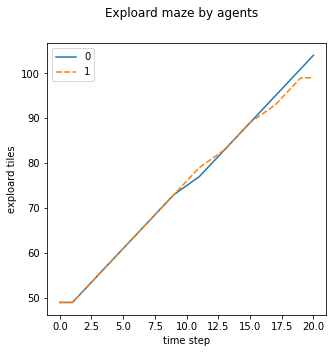

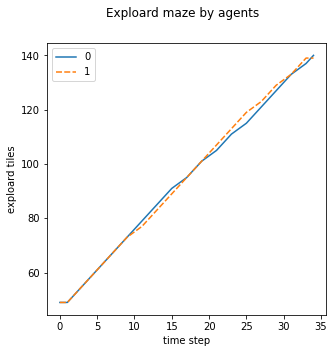

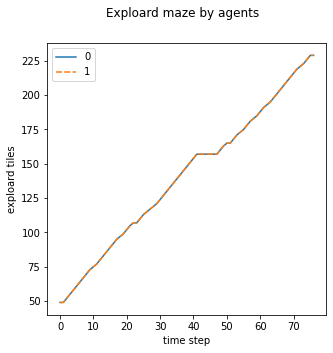

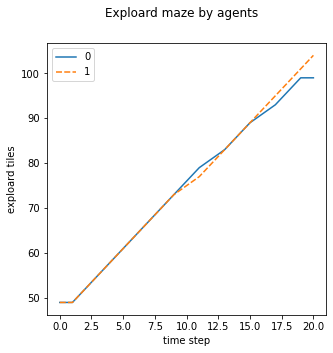

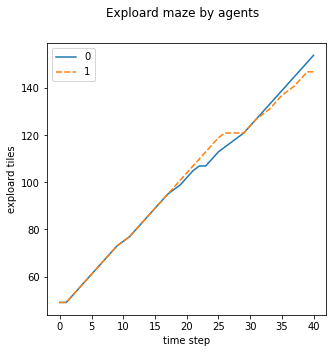

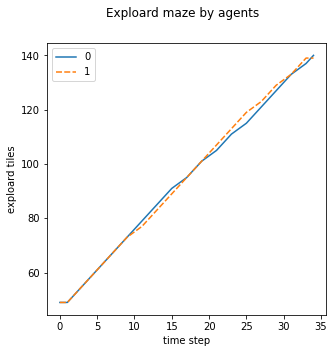

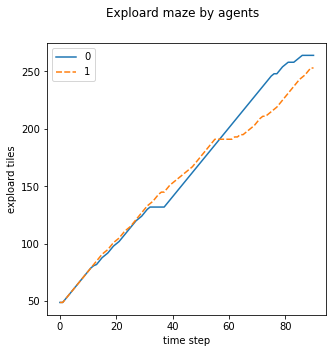

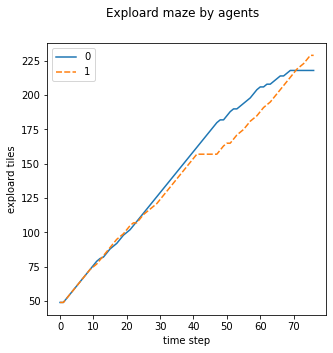

In [ ]:
plot_batch(read_data('2_pathfinding_agents'))

__Experiment 2: Twee pathfinding runners__

In [ ]:
plot_batch(read_data('2_pathfinding_speed_agents'))

__Experiment 3: Pathfinding, Random en Leaftraker runners__

In [ ]:
plot_batch(read_data('1_pathfinding_1_random_agents'))

__Experiment 4: Pathfinding, Random en Leaftraker runners__

In [ ]:
plot_batch(read_data('1_pathfinding_1_random_speed_agent'))